Epoch 1/10
469/469 [==============================] - 67s 142ms/step - loss: 0.2367 - val_loss: 0.1510
Epoch 2/10
469/469 [==============================] - 67s 143ms/step - loss: 0.1393 - val_loss: 0.1295
Epoch 3/10
469/469 [==============================] - 67s 142ms/step - loss: 0.1255 - val_loss: 0.1201
Epoch 4/10
469/469 [==============================] - 67s 142ms/step - loss: 0.1190 - val_loss: 0.1156
Epoch 5/10
469/469 [==============================] - 67s 142ms/step - loss: 0.1152 - val_loss: 0.1125
Epoch 6/10
469/469 [==============================] - 67s 142ms/step - loss: 0.1126 - val_loss: 0.1110
Epoch 7/10
469/469 [==============================] - 63s 135ms/step - loss: 0.1107 - val_loss: 0.1088
Epoch 8/10
469/469 [==============================] - 64s 136ms/step - loss: 0.1092 - val_loss: 0.1072
Epoch 9/10
469/469 [==============================] - 64s 137ms/step - loss: 0.1079 - val_loss: 0.1060
Epoch 10/10
469/469 [==============================] - 64s 135ms/step - l

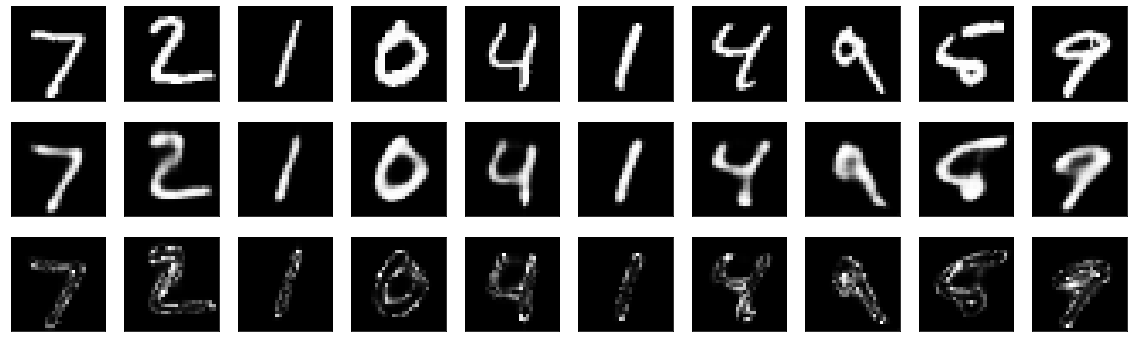

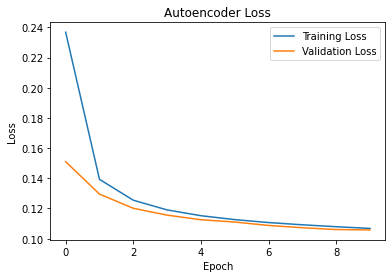

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load and preprocess the input images
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Define the architecture of the autoencoder
input_shape = (28, 28, 1)
latent_dim = 32

encoder_inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_inputs)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(encoder_inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Generate the reconstructed images
decoded_images = autoencoder.predict(x_test)

# Display the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference images
    ax = plt.subplot(3, n, i + 1 + n + n)
    difference = np.abs(x_test[i].reshape(28, 28) - decoded_images[i].reshape(28, 28))
    plt.imshow(difference)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Compute metrics
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss
plt.figure()
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Let's go through the code step by step to understand what each part does.

Data Loading and Preprocessing:

The code starts by loading the MNIST dataset using the keras.datasets.mnist.load_data() function.
The loaded dataset is divided into training and testing sets (x_train, x_test).
The pixel values of the images are normalized to the range of 0 to 1 by dividing by 255.
The shape of the images is reshaped to (batch_size, 28, 28, 1) to match the input shape of the autoencoder.
Autoencoder Architecture:

The autoencoder architecture is defined using the Keras functional API.
The encoder part consists of three convolutional layers with ReLU activation and max-pooling layers for downsampling the input image.
The decoder part consists of three convolutional layers with ReLU activation and upsampling layers for upsampling the compressed representation.
The last layer of the decoder uses a sigmoid activation function to reconstruct the image with pixel values in the range of 0 to 1.
Autoencoder Compilation and Training:

The autoencoder model is compiled using the Adam optimizer and the binary cross-entropy loss function.
The model is trained using the fit() method, passing the training images as both input and target.
The training is performed for 10 epochs with a batch size of 128.
The validation data is specified as the testing images.
Image Reconstruction and Display:

After training, the autoencoder is used to reconstruct the images from the testing set (x_test).
A loop is used to display a set number of original images, reconstructed images, and the difference between them.
Matplotlib is used to display the images in a grid.
Metrics and Loss Plotting:

The loss values from the training process are stored in the loss and val_loss variables.
Matplotlib is used to plot the training and validation loss over the epochs.
The code aims to train an autoencoder to learn a compressed representation of the input images and then reconstruct them. The loss function helps to minimize the difference between the original and reconstructed images. The displayed images and loss plot provide insights into the performance of the autoencoder and the quality of the reconstructions.